# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
import warnings

In [2]:
sns.set(style='whitegrid')
warnings.filterwarnings('ignore')

# Import Dataset

In [3]:
df = pd.read_csv('data.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


id: Unique ID for the customer
Gender: Gender of the customer
Age: Age of the customer
Driving_License: [0 : Customer does not have DL, 1 : Customer already has DL]
Region_Code: Unique code for the region of the customer
Previously_Insured: [1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance]
Vehicle_Age: Age of the Vehicle
Vehicle_Damage: [1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.]
Annual_Premium: The amount customer needs to pay as premium in the year
Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
Vintage: Number of Days, Customer has been associated with the company
Response: [1 : Customer is interested, 0 : Customer is not interested]

In [4]:
df.shape

(381109, 12)

In [5]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

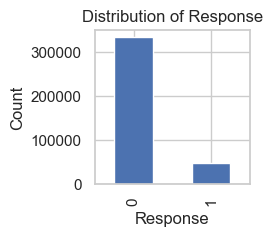

In [9]:
value_counts = df['Response'].value_counts()

plt.figure(figsize=(2,2))

value_counts.plot(kind='bar')

plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Distribution of Response')

plt.show()

<Axes: >

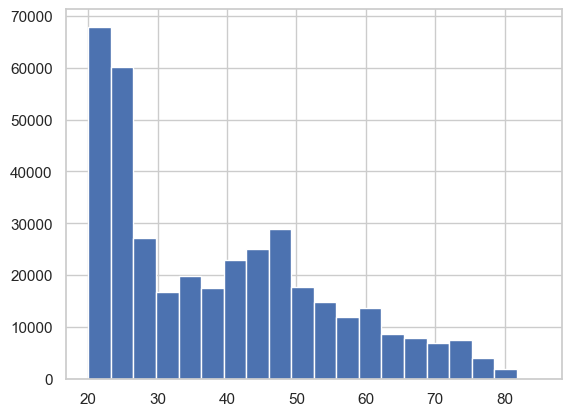

In [10]:
df['Age'].hist(bins=20)

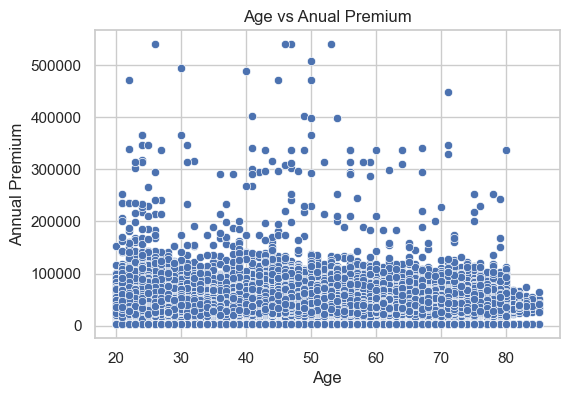

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age',y='Annual_Premium',data=df)
plt.title('Age vs Anual Premium')
plt.xlabel('Age')
plt.ylabel('Annual Premium')
plt.show()

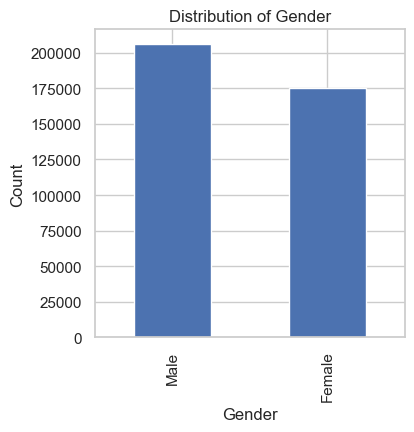

In [12]:
value_counts = df['Gender'].value_counts()
plt.figure(figsize=(4,4))

value_counts.plot(kind='bar')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

plt.show()

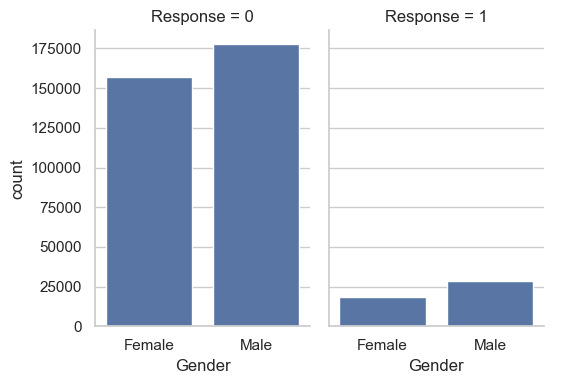

In [13]:
data = df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

g = sns.catplot(x='Gender',y='count',col='Response',data=data,kind='bar',height=4,aspect=.7)

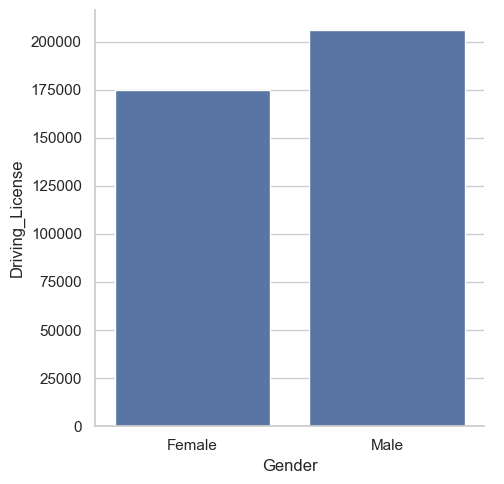

In [14]:
data = df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
sns.catplot(x='Gender',y='Driving_License',data=data,kind='bar')

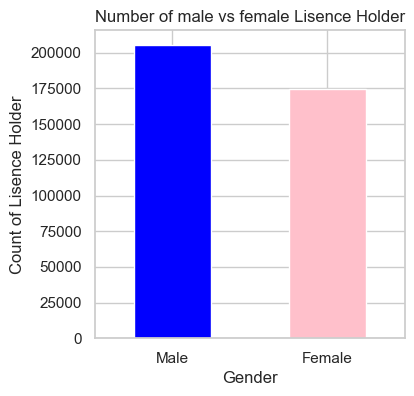

In [15]:
lisence_holder = df[df['Driving_License'] == 1]

gender_counts = lisence_holder['Gender'].value_counts()

plt.figure(figsize=(4,4))
gender_counts.plot(kind='bar',color=['blue','pink'])
plt.title('Number of male vs female Lisence Holder')
plt.xlabel('Gender')
plt.ylabel('Count of Lisence Holder')
plt.xticks(rotation=0)
plt.show()

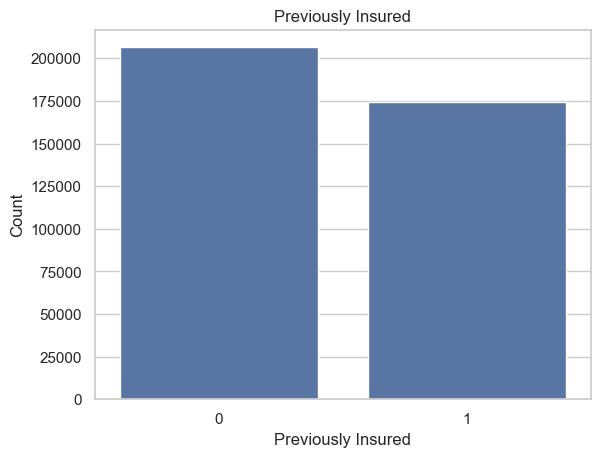

In [16]:
sns.countplot(x=df['Previously_Insured'])
plt.title("Previously Insured")
plt.xlabel("Previously Insured")
plt.ylabel("Count")
plt.show()

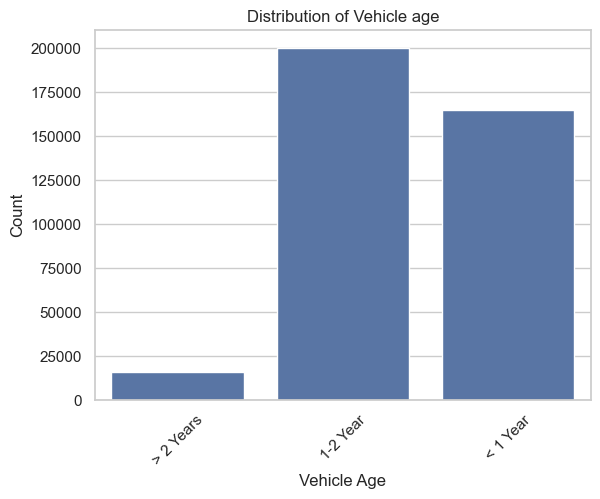

In [17]:
sns.countplot(x=df['Vehicle_Age'])
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.title('Distribution of Vehicle age')
plt.xticks(rotation=45)
plt.show()

In [18]:
data = df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
data

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


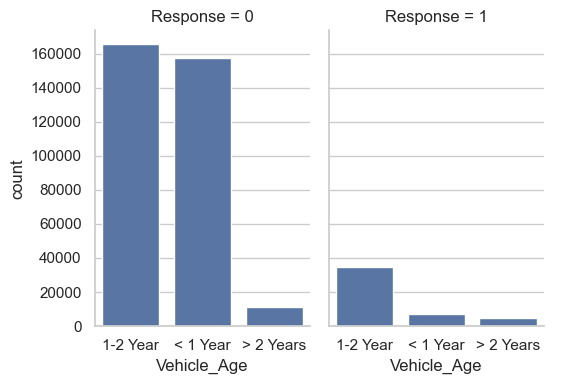

In [19]:
g = sns.catplot(x='Vehicle_Age',y='count',col='Response',data=data,kind='bar',height=4,aspect=.7)

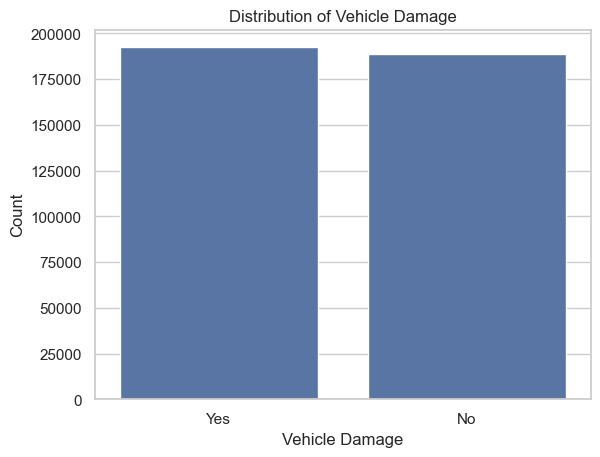

In [20]:
sns.countplot(data=df,x='Vehicle_Damage')
plt.title('Distribution of Vehicle Damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()

In [21]:
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

<Axes: >

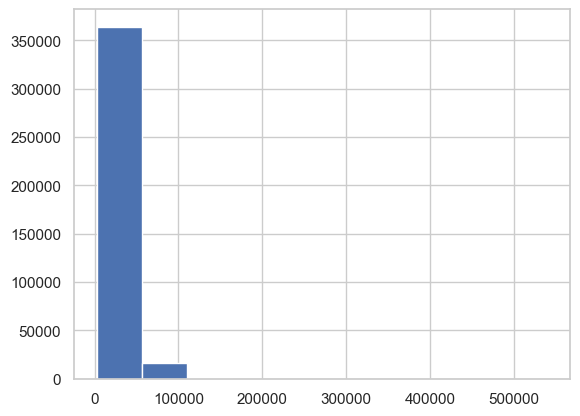

In [22]:
df['Annual_Premium'].hist(bins=10)

In [23]:
df[df['Annual_Premium']>200000]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1412,1413,Female,41,1,28.0,0,1-2 Year,Yes,267698.0,124.0,63,1
11319,11320,Female,50,1,46.0,1,1-2 Year,No,508073.0,26.0,192,0
13426,13427,Female,47,1,28.0,0,1-2 Year,Yes,301762.0,124.0,22,0
15024,15025,Female,32,1,28.0,0,1-2 Year,Yes,315565.0,155.0,150,0
25532,25533,Male,50,1,28.0,0,1-2 Year,Yes,229935.0,122.0,64,1
...,...,...,...,...,...,...,...,...,...,...,...,...
368263,368264,Female,25,1,28.0,1,< 1 Year,Yes,346982.0,124.0,74,0
371910,371911,Female,23,1,37.0,1,< 1 Year,No,235683.0,152.0,246,0
372492,372493,Male,46,1,18.0,0,1-2 Year,No,220581.0,26.0,210,0
373415,373416,Male,56,1,28.0,0,1-2 Year,No,337573.0,26.0,239,0


# Data Preprocessing

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [30]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year',
'Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [26]:
df['Gender'] = df['Gender'].map({'Female':0,'Male':1}).astype(int)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [27]:
for col in df.columns:
    print(f'{col} >> {df[col].dtype}')

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Vehicle_Age >> object
Vehicle_Damage >> object
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64


In [28]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,False,True,True
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,True,False,False
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,True,False,False


In [31]:
# cols renaming and keeping dtype as int

df = df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year'] = df['Vehicle_Age_lt_1_Year'].astype('int')
df['Vehicle_Age_gt_2_Years'] = df['Vehicle_Age_gt_2_Years'].astype('int')
df['Vehicle_Damage_Yes'] = df['Vehicle_Damage_Yes'].astype('int')

In [32]:
for column in cat_feat:
    df[column] = df[column].astype('str')

In [33]:
# scaling the data

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
df[num_feat] = ss.fit_transform(df[num_feat])


mm = MinMaxScaler()
df[['Annual_Premium']] = mm.fit_transform(df[['Annual_Premium']])

# also, dropping id col now
id=df.id
df=df.drop('id',axis=1)

In [34]:
# train-test split

from sklearn.model_selection import train_test_split

train_target=df['Response']
train=df.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [35]:
train_target

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

In [36]:
train.head(1)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,0,1,1


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

my_params = {'n_estimators': [300], 'min_samples_split': [7], 'min_samples_leaf': [6], 'max_depth': [10], 'criterion': ['entropy']}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = my_params, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
# for above line of code, feel free to make changes if can be made better

model.fit(x_train,y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy'],
                                        'max_depth': [10],
                                        'min_samples_leaf': [6],
                                        'min_samples_split': [7],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [44]:
best_params = model.best_params_

print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_depth': 10, 'criterion': 'entropy'}


In [45]:
# save model

import pickle

filename = 'rf_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [46]:
# loading back pickle file

rf_load = pickle.load(open(filename, 'rb'))

# Model Evaluation

In [ ]:
from sklearn.metrics import classification_report

y_pred=model.predict(x_test)
print (classification_report(y_test, y_pred))